In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
ls

ML Assignment .ipynb     Untitled1.ipynb          untitled.txt
Machinelearning3.ipynb   machinelearning 2.ipynb
Untitled.ipynb           new.ipynb


In [3]:
cd ..

/Users/pikachu/Downloads


In [4]:
cd yelp_dataset/

/Users/pikachu/Downloads/yelp_dataset


In [5]:
# import the data (chunksize returns jsonReader for iteration)
sub_businesses = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=100000)
sub_reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=100000)
sub_checkins = pd.read_json("yelp_academic_dataset_checkin.json", lines=True, orient='columns', chunksize=100000)
sub_users = pd.read_json("yelp_academic_dataset_user.json", lines=True, orient='columns', chunksize=100000)
sub_tips = pd.read_json("yelp_academic_dataset_tip.json", lines=True, orient='columns', chunksize=100000)
for ts in sub_tips:
    tip = ts
    break
# read the data 
for bs in sub_businesses:
    business = bs
    break
    
for rs in sub_reviews:
    review = rs
    break
      
for ci in sub_checkins:
    checkin = ci
    break
    
for ur in sub_users:
    user = ur
    break
  

In [6]:
x = business['stars'].value_counts().index
y = business['stars'].value_counts().values

Text(0.5, 0, 'Ratings ')

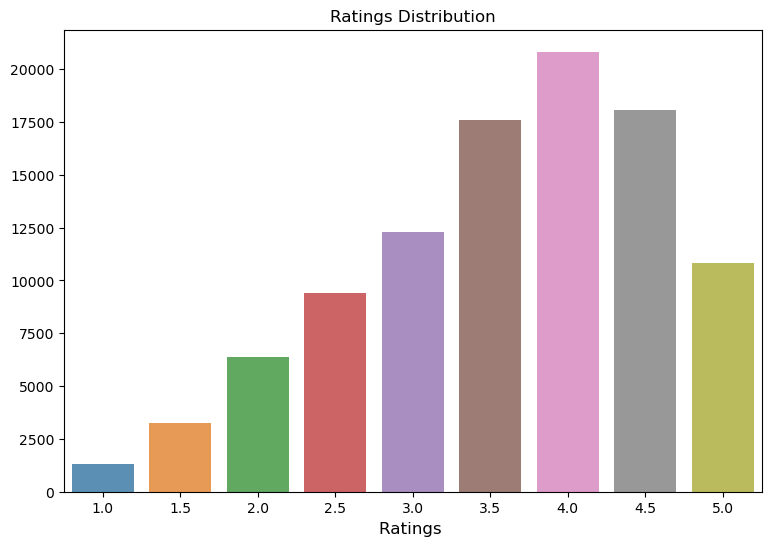

In [7]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x=x, y=y,data = business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

In [8]:
# Create dataframe having only Restaurant business.
all_cities = business[business['categories'].str.contains('Rest.*')==True]

# Creating dummies dataframe from series for 'categories' 
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

# Dropping Restaurants and Food columns as this analysis is for Resturants and these words are common to all entries
df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# Removing the whitespaces from the column names
df_rest.columns = df_rest.columns.str.lstrip()

# Adding up all the rows to get the sum of columns and merging the columns with same names
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()
# Extracting name of all the cities
from_business = all_cities[['city']]

In [9]:
# Getting count of Vegetarian restaurants in each city
all_rest.join(from_business).groupby('city').sum()['Vegetarian'].sort_values(ascending=False)

city
Philadelphia    138
New Orleans      48
Tampa            44
Nashville        41
Tucson           40
               ... 
Inglewood         0
Ivyland           0
Jamison           0
Jefferson         0
wimauma           0
Name: Vegetarian, Length: 813, dtype: int64

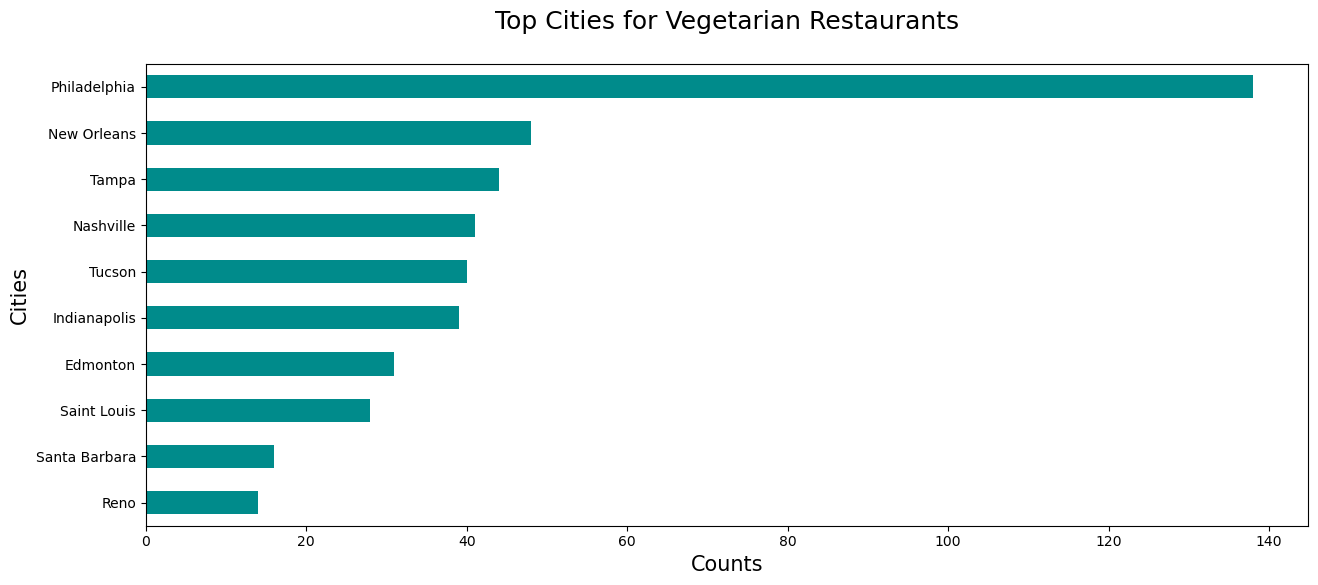

In [10]:
plt.figure(figsize=(15,6))
all_rest.join(from_business).groupby('city').sum()['Vegetarian'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='Darkcyan')
plt.title('Top Cities for Vegetarian Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Cities', fontsize=15)
plt.show()

In [11]:
# Getting count of Vegetarian restaurants in each city
all_rest.join(from_business).groupby('city').sum()['Vegetarian'].sort_values(ascending=False)

city
Philadelphia    138
New Orleans      48
Tampa            44
Nashville        41
Tucson           40
               ... 
Inglewood         0
Ivyland           0
Jamison           0
Jefferson         0
wimauma           0
Name: Vegetarian, Length: 813, dtype: int64

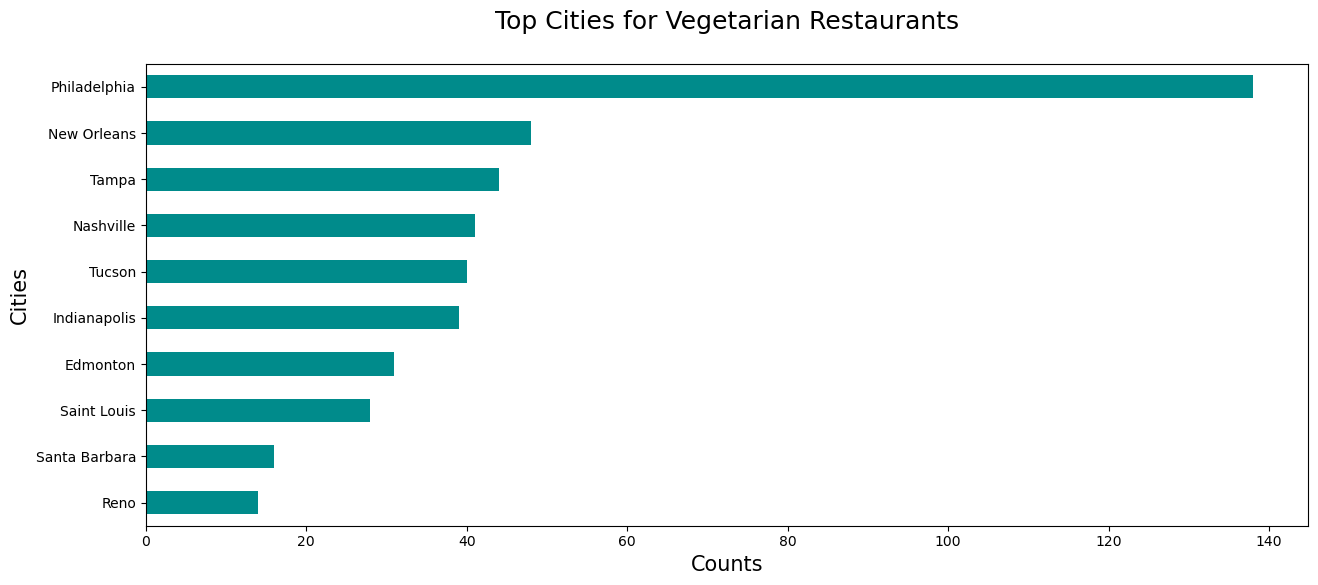

In [12]:
plt.figure(figsize=(15,6))
all_rest.join(from_business).groupby('city').sum()['Vegetarian'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='Darkcyan')
plt.title('Top Cities for Vegetarian Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Cities', fontsize=15)
plt.show()

In [13]:
# Getting the Users(Yelpers) based on review counts
review_total = user.sort_values(by='review_count',ascending=True)

# Getting the Users based on number of fans
fans = user.sort_values(by='fans',ascending=True)

# Getting the Users based on number of total friends on yelp
user['total_friends'] = [len(user.iloc[i,8]) for i in range(0,100000)]
friends = user.sort_values(by='total_friends',ascending=True)

# Getting the Users based on number of useful reviews 
useful = user.sort_values(by='useful',ascending=True)

In [14]:
# Create new column named 'ratio'
user['ratio'] = (user['useful'] * user['review_count']) / sum(user['review_count'])

In [15]:
# Creating new dataset with User data
Top_influencer = user.sort_values(by='ratio',ascending=True)[['name','review_count','useful','ratio','yelping_since']]

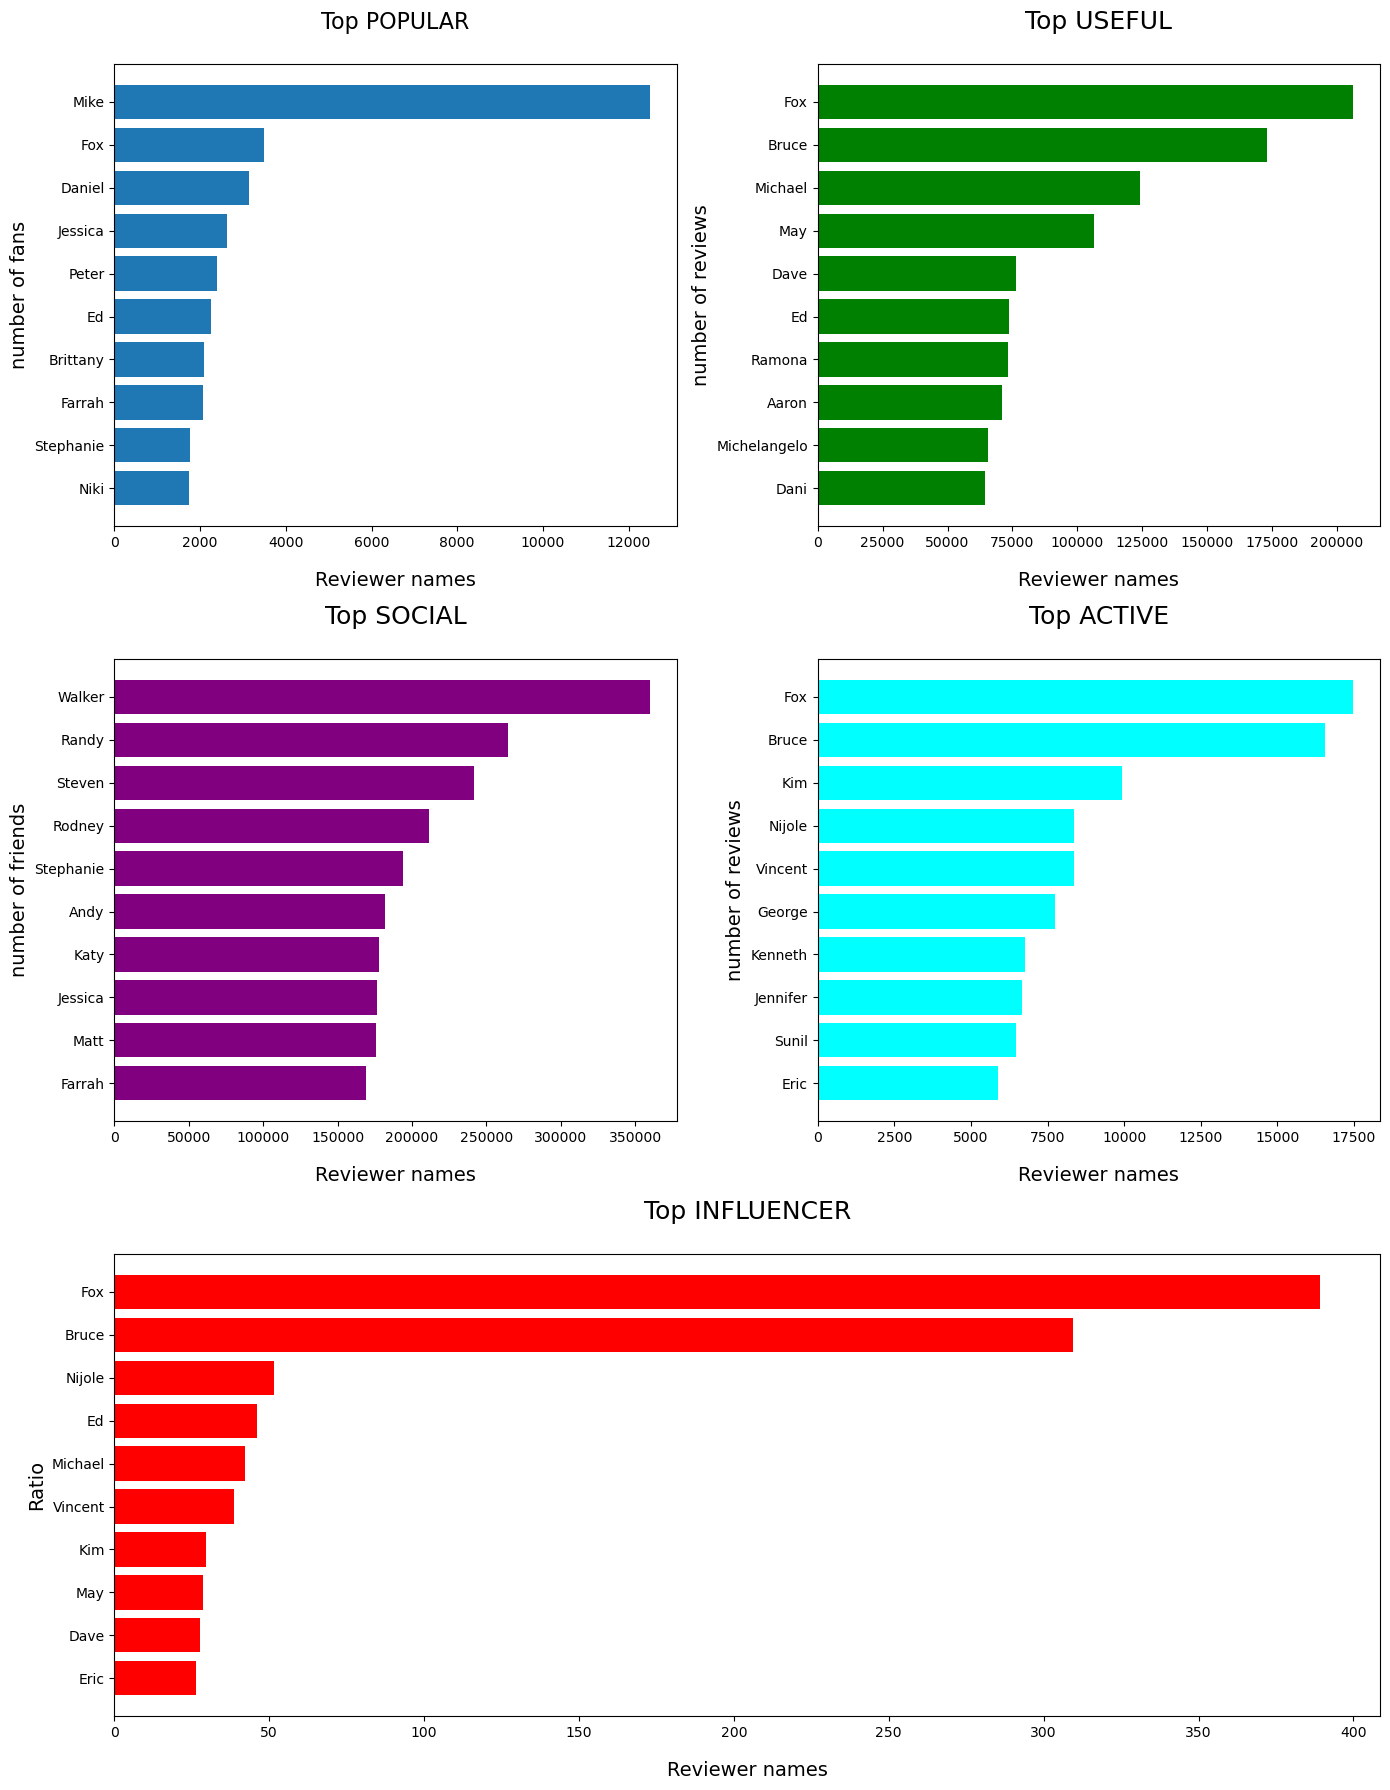

In [16]:
import matplotlib.gridspec as gridspec

gridspec.GridSpec(3,2)
plt.figure(figsize=(14,18)) 

# Plotting the most popular reviewers based on the count of their fans
plt.subplot2grid((3,2), (0,0))
plt.barh(fans['name'][-10:],fans['fans'][-10:])
#plt.barh(fans['name'][:10],fans['fans'][:10])

plt.title('Top POPULAR',fontsize=16, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of fans', fontsize=14)

# Plotting the 10 most popular reviewers based on the count of their useful reviews
#plt.subplot(322)
plt.subplot2grid((3,2), (0,1))
plt.barh(useful['name'][-10:],useful['useful'][-10:],color='green')

plt.title('Top USEFUL',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of reviews', fontsize=14)

# Plotting the 10 most popular reviewers based on the count of their friends on yelp
#plt.subplot(323)
plt.subplot2grid((3,2), (1,0))
plt.barh(friends['name'][-10:],friends['total_friends'][-10:],color='purple')

plt.title('Top SOCIAL',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of friends', fontsize=14)

# Plotting the 10 most popular reviewers based on the count of their reviews posted on yelp
#plt.subplot(324)
plt.subplot2grid((3,2), (1,1))
plt.barh(review_total['name'][-10:],review_total['review_count'][-10:],color='cyan')

plt.title('Top ACTIVE',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of reviews', fontsize=14)

# Plotting the 10 most popular reviewers based on the ratio of their useful reviews to total reviews
#plt.subplot(325)
plt.subplot2grid((3,2),(2,0),colspan=2, rowspan=2)
plt.barh(Top_influencer['name'][-10:],Top_influencer['ratio'][-10:],color='red')

plt.title('Top INFLUENCER',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('Ratio', fontsize=14)

# comment out the following line and run cell to see the difference it makes
plt.tight_layout() # makes sure there is no overlap in plots 
plt.show()

In [17]:
range(0,checkin.shape[0])

range(0, 100000)

In [18]:
# Creating a new column to see how many people cheacked in to the business over the years
checkin['total'] = [len(checkin.iloc[i,1]) for i in range(0,100000)]

In [19]:
checkin.head(1)

,business_id,date,total
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",229


In [20]:
# Sorting the businesses by total number of check-ins to get the top businesses with most check-ins
checkin_sort = checkin.sort_values(by='total',ascending=False)

# Getiing the name of the businesses
business_check = pd.merge(checkin_sort,business,on='business_id')
business_check.head(1)

,business_id,date,total,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,-QI8Qi8XWH3D8y8ethnajA,"2010-01-17 16:30:46, 2010-01-18 20:17:55, 2010...",1095022,Philadelphia International Airport - PHL,8500 Essington Ave,Philadelphia,PA,19153,39.873074,-75.243249,2.5,2149,1,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCard...","Professional Services, Airports, Local Service...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


/var/folders/xc/b91dywt92n187f87ddb8rgz40000gn/T/ipykernel_2846/2949382070.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review['date'].dt.day, color='green')
/var/folders/xc/b91dywt92n187f87ddb8rgz40000gn/T/ipykernel_2846/2949382070.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rev

Text(0, 0.5, 'ratio')

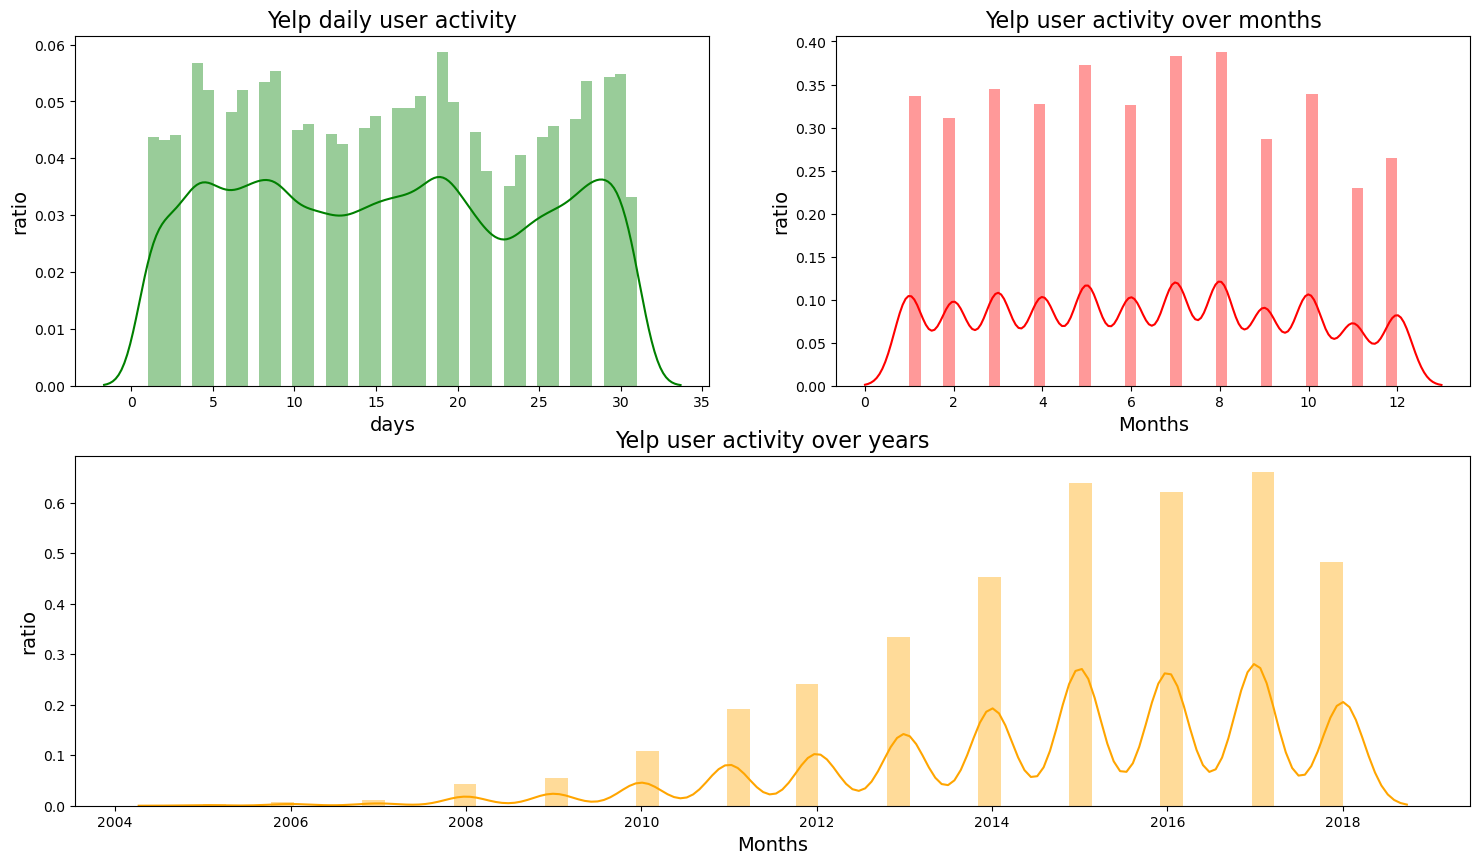

In [21]:
gridspec.GridSpec(2,2)

plt.figure(figsize=(18,10)) 

# Plotting daily activity of users on yelp
plt.subplot2grid((2,2), (0,0))
sns.distplot(review['date'].dt.day, color='green')
plt.title('Yelp daily user activity',fontsize=16)
plt.xlabel('days', fontsize=14)
plt.ylabel('ratio', fontsize=14)

# Plotting activity of usres on yelp over a month
plt.subplot2grid((2,2), (0,1))
sns.distplot(review['date'].dt.month, color='red')
plt.title('Yelp user activity over months',fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('ratio', fontsize=14)

# Plotting activity of usres on yelp over an year
plt.subplot2grid((2,2), (1,0),colspan=2, rowspan=2)
sns.distplot(review['date'].dt.year, color='orange')
plt.title('Yelp user activity over years',fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('ratio', fontsize=14)


In [22]:
business_check.columns

Index(['business_id', 'date', 'total', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [23]:
business_check.dtypes

business_id      object
date             object
total             int64
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [24]:
df_cat = pd.DataFrame(data = business_check.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

['business_id',
 'date',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'attributes',
 'categories',
 'hours']

In [25]:
df_cat = business_check[cat_var]
df_cat.head()

,business_id,date,name,address,city,state,postal_code,attributes,categories,hours
0,-QI8Qi8XWH3D8y8ethnajA,"2010-01-17 16:30:46, 2010-01-18 20:17:55, 2010...",Philadelphia International Airport - PHL,8500 Essington Ave,Philadelphia,PA,19153,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCard...","Professional Services, Airports, Local Service...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,FEXhWNCMkv22qG04E83Qjg,"2010-01-16 07:39:02, 2010-01-17 14:04:18, 2010...",Café Du Monde,800 Decatur St,New Orleans,LA,70116,"{'RestaurantsReservations': 'False', 'Alcohol'...","Flowers & Gifts, Gift Shops, Cafes, Restaurant...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
2,Eb1XmmLWyt_way5NNZ7-Pw,"2010-01-21 19:43:12, 2010-02-03 10:17:21, 2010...",Louis Armstrong New Orleans International Airp...,"1 Terminal Dr, Kenner",Kenner,LA,70062,"{'WiFi': 'u'free'', 'OutdoorSeating': 'False',...","Hotels & Travel, Airports, Transportation","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,c_4c5rJECZSfNgFj7frwHQ,"2010-02-06 18:03:00, 2010-02-08 00:06:52, 2010...",Tampa International Airport,4100 George J Bean Pkwy,Tampa,FL,33607,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Hotels & Travel, Shopping, Airports, Parking, ...","{'Monday': '6:0-6:0', 'Tuesday': '6:0-6:0', 'W..."
4,4i4kmYm9wgSNyF1b6gKphg,"2010-01-21 19:31:34, 2010-01-26 22:12:24, 2010...",Nashville International Airport - BNA,"1 Terminal Dr, Ste 501",Nashville,TN,37214,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Car Rental, Hotels & Travel, Transportation, A...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [26]:
df_cat_v1 = df_cat.dropna()
df_cat_v1.shape

(53098, 10)

In [27]:
cat_var1 = ['business_id',
 'date',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'attributes',
 'categories',
 'hours']
cat_var2 =  ['business_id',
 'date',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'attributes',
 'categories',
 'hours']

In [28]:
from itertools import product

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [29]:
import scipy.stats as ss

In [31]:
business_check

,business_id,date,total,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,-QI8Qi8XWH3D8y8ethnajA,"2010-01-17 16:30:46, 2010-01-18 20:17:55, 2010...",1095022,Philadelphia International Airport - PHL,8500 Essington Ave,Philadelphia,PA,19153,39.873074,-75.243249,2.5,2149,1,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCard...","Professional Services, Airports, Local Service...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,FEXhWNCMkv22qG04E83Qjg,"2010-01-16 07:39:02, 2010-01-17 14:04:18, 2010...",842287,Café Du Monde,800 Decatur St,New Orleans,LA,70116,29.957525,-90.061861,4.0,1880,1,"{'RestaurantsReservations': 'False', 'Alcohol'...","Flowers & Gifts, Gift Shops, Cafes, Restaurant...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
2,Eb1XmmLWyt_way5NNZ7-Pw,"2010-01-21 19:43:12, 2010-02-03 10:17:21, 2010...",788800,Louis Armstrong New Orleans International Airp...,"1 Terminal Dr, Kenner",Kenner,LA,70062,29.995874,-90.255164,3.0,1789,1,"{'WiFi': 'u'free'', 'OutdoorSeating': 'False',...","Hotels & Travel, Airports, Transportation","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,c_4c5rJECZSfNgFj7frwHQ,"2010-02-06 18:03:00, 2010-02-08 00:06:52, 2010...",787876,Tampa International Airport,4100 George J Bean Pkwy,Tampa,FL,33607,27.980774,-82.534718,4.0,1849,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Hotels & Travel, Shopping, Airports, Parking, ...","{'Monday': '6:0-6:0', 'Tuesday': '6:0-6:0', 'W..."
4,4i4kmYm9wgSNyF1b6gKphg,"2010-01-21 19:31:34, 2010-01-26 22:12:24, 2010...",654526,Nashville International Airport - BNA,"1 Terminal Dr, Ste 501",Nashville,TN,37214,36.134256,-86.672806,3.5,949,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Car Rental, Hotels & Travel, Transportation, A...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66490,dfAotOzMI8i4K2wFPPB3Hg,2018-08-21 17:45:30,19,ACERTUS,110 Rock Cliff Ct,Saint Louis,MO,63123,38.526960,-90.333269,2.0,28,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Couriers & Delivery Services, Local Services","{'Monday': '7:30-21:0', 'Tuesday': '7:30-21:0'..."
66491,Dlqy_Cq6GW5G30cm4dUzpg,2021-05-23 15:49:36,19,The Sculpture Studio,"1204 W Front St, Ste 7",Boise,ID,83702,43.616918,-116.209701,5.0,5,1,None,"Arts & Entertainment, Cultural Center",None
66492,DlKhZmybOwLco7EcYZYmeQ,2021-05-05 12:26:59,19,Berwyn Veterinary Center,1058 Lancaster Ave,Berwyn,PA,19312,40.043896,-75.449470,4.5,7,1,{'ByAppointmentOnly': 'True'},"Acupuncture, Pets, Veterinarians, Health & Med...","{'Monday': '8:30-19:0', 'Tuesday': '8:30-18:0'..."
66493,Dl4qA4li8mwXOOIyo6H9aw,2015-04-24 05:16:16,19,Noah Pritikin Computer Services,,Boise,ID,83705,43.569855,-116.224930,5.0,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Home Services, Local Services, IT Services & C...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-23:0', '..."


In [32]:
crosstab = pd.crosstab(business_check.stars, business_check.city) # create a contingecy table
crosstab

city,AMBLER,ARDMORE,AVON,Abington,Abington Township,Affton,Afton,Aldan,Algiers,Aliso Viejo,...,reno,santa Barbara,sewell,sparks,tucson,wilmington,wimauma,​Clayton,​Largo,​Lithia
stars,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5,0,0,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2.0,0,0,0,6,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,0,0,0,7,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,1,1,0,12,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.5,0,0,1,12,0,2,0,3,0,0,...,0,0,0,1,1,0,0,0,0,0
4.0,0,0,0,7,2,4,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4.5,0,0,0,14,0,5,0,2,0,0,...,1,1,0,0,0,0,1,0,0,0
5.0,0,0,0,9,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [38]:
chi_square_stat, p_value, _, _ = chi2_contingency(crosstab) # chi-square test
print(f'p value of chi-square test:{p_value:.3f}')

p value of chi-square test:0.000


In [74]:
#merged_df = pd.merge(business, checkin, on='business_id', how='inner')
merged_df = pd.merge(merged_df, tip, on='business_id', how='inner')
#merged_df = pd.merge(merged_df, user, on='user_id', how='inner')

In [77]:
merged_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date_x,total,user_id,text,date_y,compliment_count
0,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","2012-07-30 18:35:27, 2012-08-11 20:40:23, 2012...",4744,T8QuUwPLnK2FBkIGkVzfbw,The decor is awesome as is the atmosphere. Unf...,2012-10-07 00:40:32,0
1,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019...",1573,_ajF-HL2EqGStjKZSYADOw,Great,2019-05-06 15:03:31,0


In [79]:
merged_df.describe()

,latitude,longitude,stars,review_count,is_open,total,date_y,compliment_count
count,3378.000000,3378.000000,3378.000000,3378.000000,3378.000000,3.378000e+03,3378,3378.000000
mean,35.522527,-89.873777,3.824304,433.993191,0.852872,4.033415e+04,2017-05-11 12:20:34.255180544,0.006809
min,27.632650,-119.962691,1.000000,5.000000,0.000000,1.900000e+01,2009-05-17 19:20:29,0.000000
25%,29.957525,-90.297761,3.500000,55.000000,1.000000,1.405000e+03,2014-03-22 08:04:20.750000128,0.000000
50%,36.191858,-86.694264,4.000000,162.000000,1.000000,5.941000e+03,2018-01-20 10:34:42.500000,0.000000
75%,39.908119,-82.326402,4.500000,467.000000,1.000000,2.072500e+04,2020-07-17 01:07:37.249999872,0.000000
max,53.626892,-74.701457,5.000000,6093.000000,1.000000,1.095022e+06,2022-01-19 19:07:52,2.000000
std,5.356156,14.301374,0.674414,738.548667,0.354286,1.389356e+05,NaN,0.089157


In [80]:
merged_df.dtypes

business_id                 object
name                        object
address                     object
city                        object
state                       object
postal_code                 object
latitude                   float64
longitude                  float64
stars                      float64
review_count                 int64
is_open                      int64
attributes                  object
categories                  object
hours                       object
date_x                      object
total                        int64
user_id                     object
text                        object
date_y              datetime64[ns]
compliment_count             int64
dtype: object

In [110]:
num_col = merged_df._get_numeric_data().columns

In [108]:
num_col

Index(['latitude', 'longitude', 'stars', 'review_count', 'is_open', 'total',
       'compliment_count'],
      dtype='object')

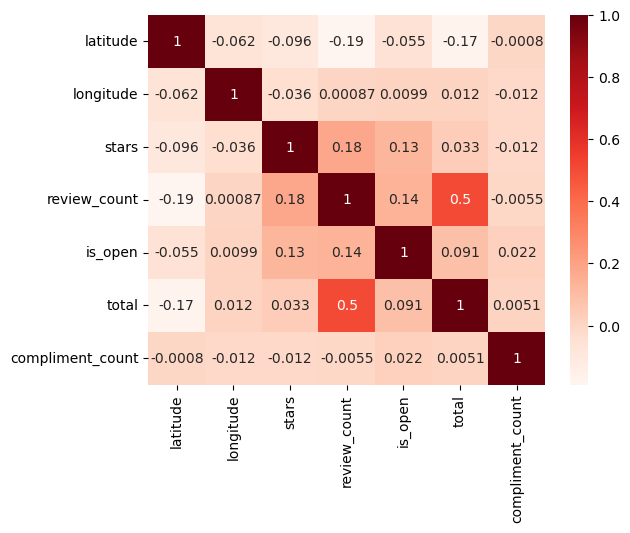

In [109]:
corr_matrix = merged_df[[ 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'total',
       'compliment_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

<Figure size 1200x800 with 0 Axes>

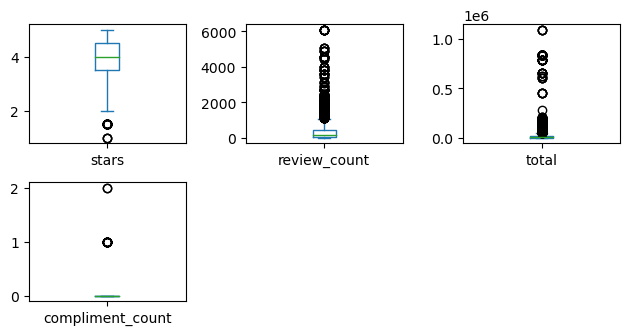

In [112]:
# Visualizing Numerical features with box plots to cross-check outliers
dataNum = merged_df[['stars', 'review_count', 'total', 'compliment_count']]

plt.figure(figsize=(12, 8))
dataNum.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [113]:
merged_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'date_x', 'total', 'user_id',
       'text', 'date_y', 'compliment_count'],
      dtype='object')

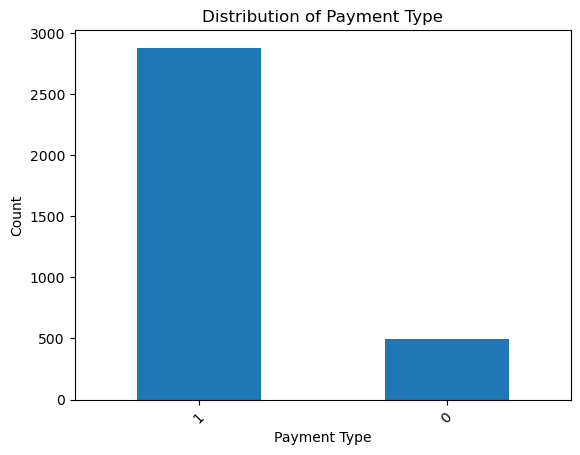

In [114]:
# Visualizing categorial features having String values with bar plots to show frequency of each value.
merged_df['is_open'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()